<a href="https://colab.research.google.com/github/Pullaganti-Sailaja/SuperstoreAnalysis/blob/main/Fashion_mnist_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fashion - MNIST - https://github.com/zalandoresearch/fashion-mnist
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

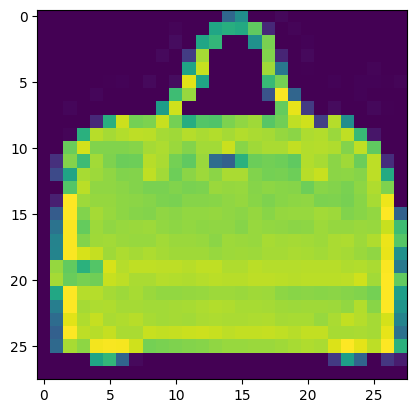

In [ ]:
plt.figure()
plt.imshow(np.squeeze(train_images[220]))

In [ ]:
train_labels[220]

8

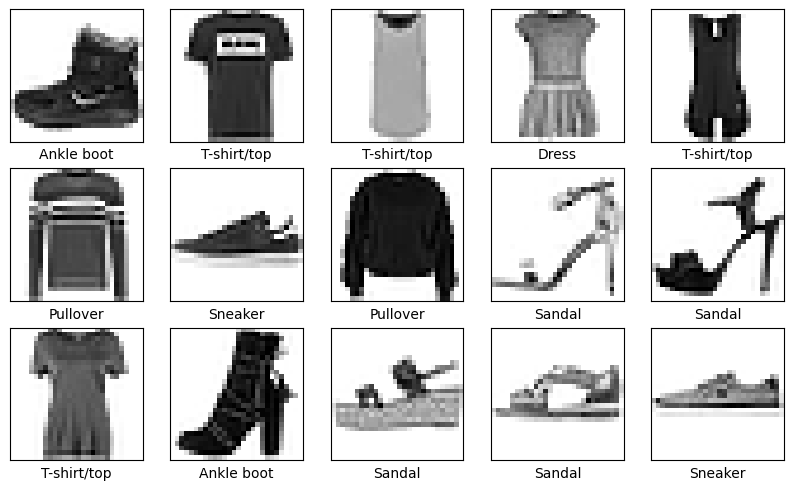

In [ ]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
train_images_norm = train_images / 255.0

In [ ]:
test_images_norm = test_images / 255.0

In [ ]:
# First convolutional layer.
# Number of neurons = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1

conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )

In [ ]:
# Second convolutional layer.
# Number of neurons = 64
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv1 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [ ]:
# Second convolutional layer.
# Number of neurons = 128
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv2 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv3 = layers.Conv2D(128, (3,3), activation='relu')

In [ ]:
# Max Pool Layer
# Since input to CNN is a 2-D image and ouput from last convolutional layer (featuerMap) is also 2-D array
# (except the third dimension i.e. channels), we will use 2D version of Max Pooling function of TensorFlow Keras
# to create a Max Pooling Layer, as shown below filter (kernel) size for Pooling Layer = 2x2

#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))


In [ ]:
# Fully Connected (FC) Layer i.e. hidden layer expects input in 1-D format (1-D array), hence, we need to convert
# 2-D output (2-D array) of last convolutional layer (conv3) to 1-D array i.e. we need to flatten the 2-D array
# to 1-D array

flat_layer = layers.Flatten()


In [ ]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer

fc = layers.Dense(128, activation='relu')

In [ ]:
# Output Layer - with 10 neurons (as we have 10 output classes) and using 'softmax' function

output = layers.Dense(10, 'softmax')

In [ ]:
# TensorFlow Keras uses Keras Sequential API

model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [ ]:
# Let us see what all layers our model has

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# we are using the normalized input data

# Let us perform 20 epochs with batch_size as 512, and with shuffling = true

# shuffle=true will shuffle the indexes of the instances in order to allocate different sets of instances
# in validation dataset each time cross-validation runs

# validation split=0.1 means a validation dataset of size of 10% is created from the training dataset for cross validation

model.fit(train_images_norm, train_labels, epochs=20, batch_size=512, shuffle=True, validation_split=0.1)

Epoch 1/20
106/106 [==============================] - 442s 4s/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.4496 - val_accuracy: 0.9233
Epoch 2/20
106/106 [==============================] - 419s 4s/step - loss: 0.0205 - accuracy: 0.9929 - val_loss: 0.4102 - val_accuracy: 0.9255
Epoch 3/20
106/106 [==============================] - 420s 4s/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.4638 - val_accuracy: 0.9237
Epoch 4/20
106/106 [==============================] - 404s 4s/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.4571 - val_accuracy: 0.9180
Epoch 5/20
106/106 [==============================] - 415s 4s/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.4727 - val_accuracy: 0.9223
Epoch 6/20
106/106 [==============================] - 410s 4s/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.4873 - val_accuracy: 0.9198
Epoch 7/20
106/106 [==============================] - 412s 4s/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.4928 - val_accuracy: 0.9247

In [29]:
# we are using the normalized input data
test_loss, test_accuracy = model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 21s 67ms/step - loss: 0.6480 - accuracy: 0.9201


In [9]:
print(test_accuracy)

NameError: name 'test_accuracy' is not defined

In [31]:
# Creating first dropout layer (for the first Conv. layer 'conv1')
drop_1 = keras.layers.Dropout(0.5)
# Creating second dropout layer (for the second Conv. layer 'conv2')
drop_2 = keras.layers.Dropout(0.5)
# Creating third dropout layer (for the third Conv. layer 'conv3')
drop_3 = keras.layers.Dropout(0.5)

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [37]:
fc= Dense(128, activation='relu')

In [38]:
new_model.add(fc)

In [39]:
# Let us create a new neural network by applying these above created Dropout Layers to the respecive convolutional Layers

# Please note that the Dropout layer for all the convolutional layers will be applied after the pooling layer (max. pool layer)

new_model = models.Sequential()

new_model.add(conv1)
# No Pooling Layer and Dropout layer for first Convolutional layer 'conv1'
new_model.add(conv2)
new_model.add(max_pool_2)
new_model.add(drop_2)
new_model.add(conv3)
new_model.add(max_pool_3)
new_model.add(drop_3)
new_model.add(flat_layer)
new_model.add(fc)
new_model.add(output)

In [40]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           multiple                  73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                 

In [7]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'new_model' is not defined

In [42]:
# Let us perform 30 epochs with batch_size as 512, and with shuffling = true

# shuffle=true will shuffle the indexes of the instances in order to allocate different sets of instances
# in validation dataset each time cross-validation runs

# validation split=0.1 means a validation dataset of size of 10% is created from the training dataset for cross validation

new_model.fit(train_images_norm, train_labels, epochs=30, batch_size=512, shuffle=True, validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 196s 2s/step - loss: 0.5323 - accuracy: 0.8113 - val_loss: 0.3111 - val_accuracy: 0.8892
Epoch 2/30
106/106 [==============================] - 194s 2s/step - loss: 0.3287 - accuracy: 0.8803 - val_loss: 0.2741 - val_accuracy: 0.9018
Epoch 3/30
106/106 [==============================] - 192s 2s/step - loss: 0.2888 - accuracy: 0.8940 - val_loss: 0.2506 - val_accuracy: 0.9098
Epoch 4/30
106/106 [==============================] - 197s 2s/step - loss: 0.2691 - accuracy: 0.8996 - val_loss: 0.2396 - val_accuracy: 0.9130
Epoch 5/30
106/106 [==============================] - 195s 2s/step - loss: 0.2542 - accuracy: 0.9061 - val_loss: 0.2427 - val_accuracy: 0.9113
Epoch 6/30
106/106 [==============================] - 195s 2s/step - loss: 0.2418 - accuracy: 0.9089 - val_loss: 0.2267 - val_accuracy: 0.9170
Epoch 7/30
106/106 [==============================] - 198s 2s/step - loss: 0.2296 - accuracy: 0.9155 - val_loss: 0.2181 - val_accuracy: 0.9207

In [43]:
test_loss, test_accuracy = new_model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 9s 30ms/step - loss: 0.2047 - accuracy: 0.9304


In [44]:
print(test_accuracy)

0.930400013923645


In [45]:
print(test_loss)

0.2047303169965744


In [10]:
print(new_model.history.history.keys())

NameError: name 'new_model' is not defined

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.plot(new_model.history.history['acc'])
plt.plot(new_model.history.history['val_acc'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'new_model' is not defined